In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

load dataset

In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X = data.data

In [6]:
df['y'] = data.target


In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

check any null values in dataset

In [8]:
print(pd.isnull(data))

False


In [9]:
scaler = StandardScaler()
featured_data = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

In [10]:
featured_data.shape

(569, 30)

In [11]:
featured_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Checking class distribution --> data is balaced or not

In [12]:
import seaborn as sns

[]

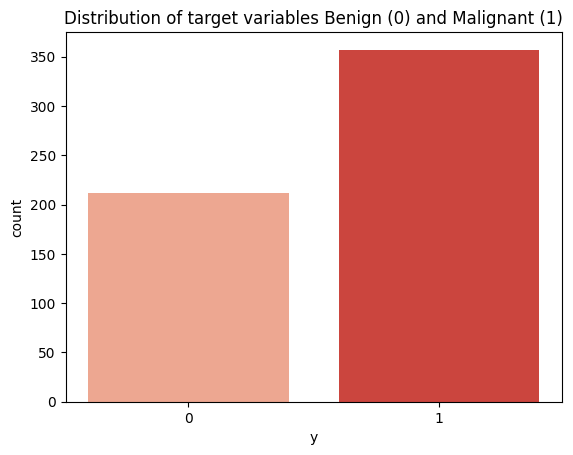

In [13]:
sns.countplot(x=df['y'], palette='Reds')
plt.title('Distribution of target variables Benign (0) and Malignant (1)')
plt.plot()


In [14]:
print(df['y'].value_counts())

y
1    357
0    212
Name: count, dtype: int64


In [15]:
benign_percent = (df['y'].value_counts()[0]/len(df))*100
melignant_percent = (df['y'].value_counts()[1]/len(df))*100
print("benign_percent : ", benign_percent)
print("melignant_percent : ", melignant_percent)

benign_percent :  37.258347978910365
melignant_percent :  62.741652021089635


Checking data contains outliers or not

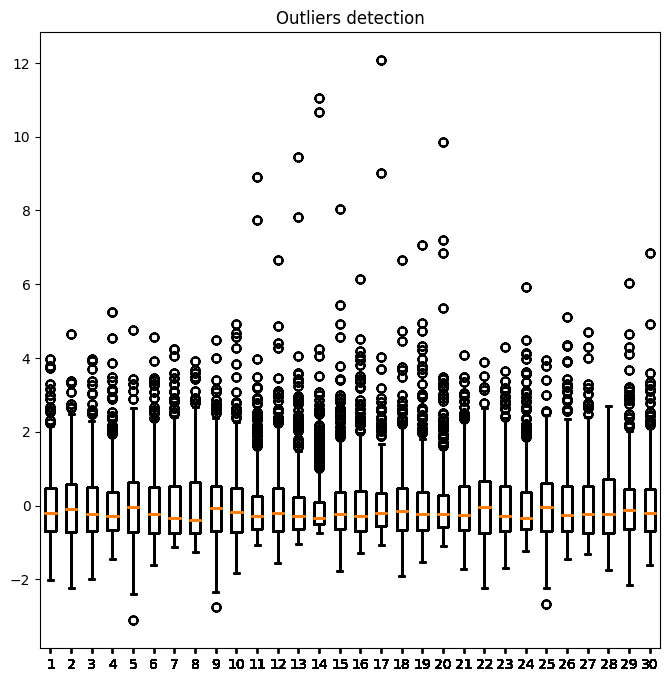

In [16]:
features=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(8,8))
for i in features:
    plt.boxplot(featured_data[features])
plt.title("Outliers detection")
plt.show()

Remove the outliers from data using Interquartile Range

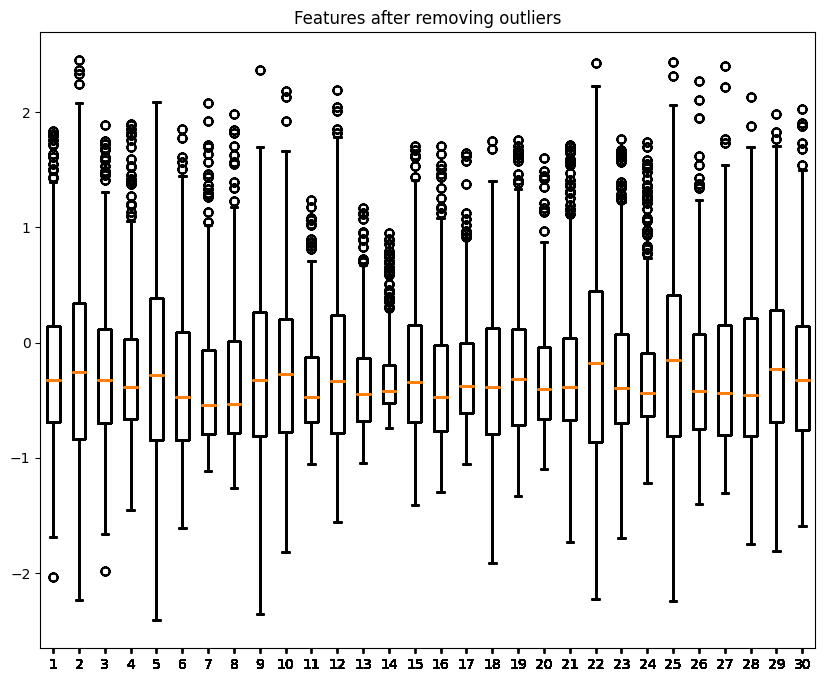

In [17]:
def remove_outliers(featured_data):
    Q1 = featured_data.quantile(0.25)
    Q3 = featured_data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return featured_data[(featured_data>=lower_bound) & (featured_data <= upper_bound)].dropna()

filtered_data = remove_outliers(featured_data)
features =['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

plt.figure(figsize=(10,8))
for i in features:
    plt.boxplot(filtered_data[features])
plt.title("Features after removing outliers")
plt.show()

checking by decreaing lower_bound and upper_bound value from 1.5 to 1.0 to check it will cover the outliers

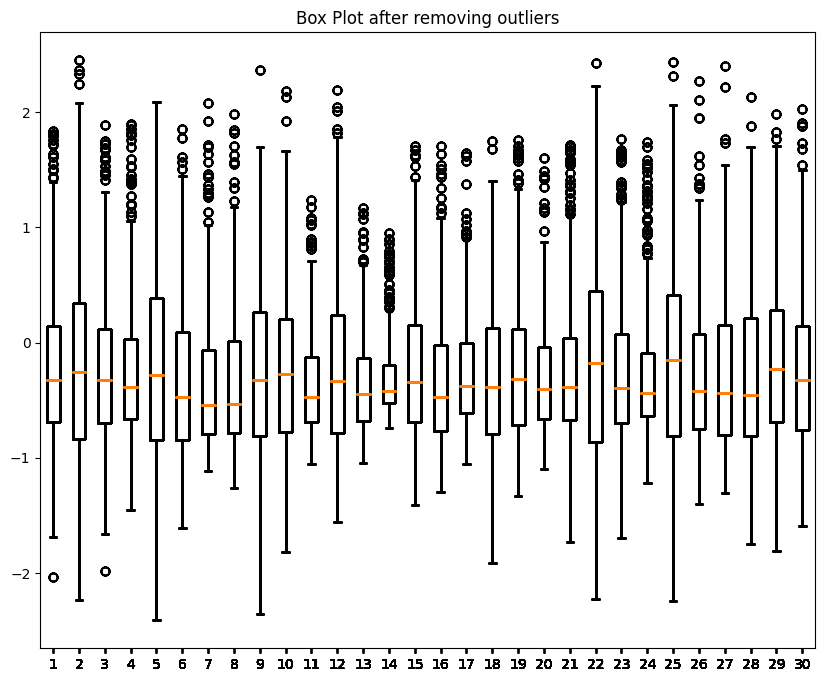

In [18]:
def remove_outliers(featured_data, y):
    Q1 = featured_data.quantile(0.25)
    Q3 = featured_data.quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1-1.0*IQR
    upper_bound = Q3+1.0*IQR
    mask = (featured_data>=lower_bound) & (featured_data <= upper_bound)
    filtered_df = featured_data[mask].dropna()
    filtered_y = y.loc[filtered_df.index]
    return filtered_df, filtered_y

X_filtered,y_filtered = remove_outliers(featured_data, df['y'])
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(10,8))
for i in features:
    plt.boxplot(filtered_data[features])
plt.title("Box Plot after removing outliers")
plt.show()

In [19]:
X = featured_data
X.shape

(569, 30)

In [20]:
y = df['y']
y.shape

(569,)

After the preprocessing of data split data for training and testing 

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
print(X_train.shape)

(455, 30)


In [41]:
print(X_test.shape)

(114, 30)


In [42]:
y.shape

(569,)

Now, train the model by applying different algorithms and show that which model get more accurate results

1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,roc_curve,auc, roc_auc_score 

handle imbalanced data using SMOT(Synthetic Minority Oversampling Technique)

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote =  SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


Feature selection using RFE(Recursive Feature Elimination)

In [56]:
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [57]:
log_reg = LogisticRegression(max_iter=500)
rfe = RFE(log_reg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

ValueError: Found input variables with inconsistent numbers of samples: [572, 455]

In [55]:
X_df = pd.DataFrame(X, columns=feature_names)
selected_features = X_df.columns[rfe.support_]
print("Top 10 Selected Features:", selected_features)

NameError: name 'feature_names' is not defined

To find best Hyperparameters use GridSearchCV 

In [52]:
from sklearn.model_selection import GridSearchCV

In [504]:
param_grid_logistic = {
    'penalty':['l1','l2','elasticnet'],
    'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80],
    'max_iter':[100,200,300],
    'solver': ['saga','liblinear']
}

In [505]:
grid_cv = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_cv.fit(X_train_rfe,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                               60, 70, 80],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')

In [506]:
print("Best Hyperparameters : ", grid_cv.best_params_)

Best Hyperparameters :  {'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [507]:
best_gridcv_logistic = LogisticRegression(**grid_cv.best_params_, random_state=42)
best_gridcv_logistic.fit(X_train_rfe, y_train)

LogisticRegression(C=2, random_state=42, solver='saga')

In [508]:
y_pred = best_gridcv_logistic.predict(X_test_rfe)
y_pred_proba = 1/(1+np.exp(-y_pred))
y_pred_proba = [1 if prob>0.5 else 0 for prob in y_pred_proba]

In [509]:
train_accuracy = best_gridcv_logistic.score(X_train_rfe, y_train)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [510]:
print("Train Accuracy Score : ", train_accuracy)
print("Test Accuracy Score : ", accuracy)
print("precision Score : ", precision)
print("recall Score : ", recall)
print("f1 Score : ", f1)
print("ÄUC Score : ", auc_score)

Train Accuracy Score :  0.9802197802197802
Test Accuracy Score :  0.9736842105263158
precision Score :  0.9722222222222222
recall Score :  0.9859154929577465
f1 Score :  0.9790209790209791
ÄUC Score :  0.969701932525385


In [511]:
classi_report = classification_report(y_test, y_pred)
print("Classification Report : \n", classi_report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Calculating false positive rate, true positive rate, threshold values

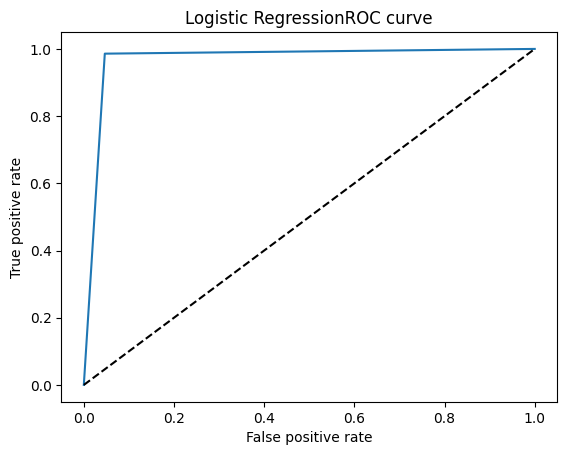

In [512]:
false_pos,true_pos,threshold = roc_curve(y_test, y_pred_proba)
#computing area under the curve
auc_score = auc(false_pos,true_pos)
plt.plot(false_pos,true_pos,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic RegressionROC curve")
plt.show()

2. Decision Tree

In [459]:
from sklearn.tree import DecisionTreeClassifier

Feature Selection

To improve model performance
fine tuning of hyperparameters is important
So, first do fine tuning

In [460]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [461]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(random_state=42)

In [462]:
feature_importances = dt.feature_importances_

In [463]:
feature_names = list(X_df.columns) 
top_features = np.argsort(feature_importances)[-10:]
selected_feature_names = [feature_names[i] for i in top_features]  
print("Top 10 Selected Features:\n", selected_feature_names)

Top 10 Selected Features:
 ['perimeter error', 'worst concavity', 'concave points error', 'radius error', 'mean texture', 'compactness error', 'worst texture', 'mean concave points', 'worst concave points', 'worst perimeter']


Hyperparameter Tuning
1. GridSearchCV

In [464]:
param_grid = {
    'max_depth':[3,5,10, None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'criterion':['gini','entropy','log_loss']
}

In [465]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [466]:
print("Best Hyperparameters : ", grid_search.best_params_)

Best Hyperparameters :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [467]:
dt_gridcv = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt_gridcv.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [468]:
y_pred_grid_dt = dt_gridcv.predict(X_test)

In [469]:
y_pred_grid_dt_prob = dt_gridcv.predict_proba(X_test)[:,-1]
y_pred_grid_dt = (y_pred_grid_dt_prob>0.5).astype(int)

In [470]:
print("GridSearchCV model perfomance : ")
print("Train Accuracy score : ", dt_gridcv.score(X_train_bal, y_train_bal))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_grid_dt))
print("Precision : ", precision_score(y_test, y_pred_grid_dt))
print("Recall : ", recall_score(y_test, y_pred_grid_dt))
print("F1 Score : ", f1_score(y_test, y_pred_grid_dt))
print("AUC Score : ", roc_auc_score(y_test, y_pred_grid_dt))
print("Clasiification Report : \n", classification_report(y_test, y_pred_grid_dt), "\n\n")

GridSearchCV model perfomance : 
Train Accuracy score :  0.9772727272727273
Test Accuracy Score :  0.9736842105263158
Precision :  1.0
Recall :  0.9577464788732394
F1 Score :  0.9784172661870504
AUC Score :  0.9788732394366197
Clasiification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.96      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114
 




2. RandomizedSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
param_distribution ={
    'max_depth':[3,5,10,None],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,10,1),
    'criterion':['gini','entropy','log_loss']
}

In [55]:
random_cv = RandomizedSearchCV(dt,param_distribution,cv=5, scoring='accuracy')
random_cv.fit(X_train_bal, y_train_bal)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   scoring='accuracy')

In [56]:
print("Best Hyperparameters : ", random_cv.best_params_)

Best Hyperparameters :  {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'gini'}


In [57]:
dt_randomcv = DecisionTreeClassifier(**random_cv.best_params_, random_state=42)
dt_randomcv.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=8,
                       random_state=42)

In [58]:
y_pred_random_dt = dt_randomcv.predict(X_test)

In [59]:
y_pred_random_dt_prob = dt_randomcv.predict_proba(X_test)[:,1]
y_pred_random_dt = (y_pred_random_dt_prob>0.5).astype(int)

Now evalute the both model performance

In [60]:
print("RandomizedSearchCV model performance : ")
print("Train Accuracy score : ", dt_randomcv.score(X_train_bal, y_train_bal))
print("Test accuracy Score : ", accuracy_score(y_test,y_pred_random_dt))
print("AUC Score : ", roc_auc_score(y_test, y_pred_random_dt))
print("Classification Report : \n", classification_report(y_test, y_pred_random_dt))

RandomizedSearchCV model performance : 
Train Accuracy score :  0.9807692307692307
Test accuracy Score :  0.956140350877193
AUC Score :  0.9602030789387488
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



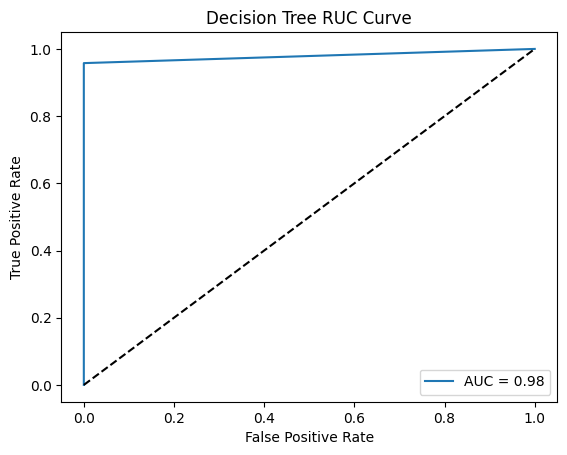

In [61]:
false_pos,true_pos,threshold = roc_curve(y_test,y_pred_grid_dt)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree RUC Curve')
plt.legend()
plt.show()

3. Random Forest Classifier

In [62]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=5, criterion='gini', random_state=42)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=5, random_state=42)

In [65]:
y_pred = rf.predict(X_test)

In [66]:
print("Train Accuracy score : ", rf.score(X_train_bal, y_train_bal))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n",classification_report(y_test, y_pred))

Train Accuracy score :  0.9965034965034965
Test Accuracy Score :  0.956140350877193
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Hyperparameter Tuning
1.GridSearchCV model

In [67]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples in leaf node
}

In [68]:
grid_cv_rf = RandomForestClassifier(random_state=42)
grid_cv_rf_train = GridSearchCV(grid_cv_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_cv_rf_train.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [215]:
print("Best Hyperparameters : ", grid_cv_rf_train.best_params_)

Best Hyperparameters :  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [216]:
rf_gridcv = RandomForestClassifier(**grid_cv_rf_train.best_params_, random_state=42)
rf_gridcv.fit(X_train_bal, y_train_bal)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=42)

In [71]:
y_pred_rf_gridcv = rf_gridcv.predict(X_test)

In [72]:
y_pred_rf_gridcv_prob = rf_gridcv.predict_proba(X_test)[:,1]
y_pred_rf_gridcv = (y_pred_rf_gridcv_prob>0.5).astype(int)

In [73]:
print("GridSearchCV model ")
print("Train Accuracy score : ", rf_gridcv.score(X_train_bal, y_train_bal))
print("Test Accuracy score : ",accuracy_score(y_test, y_pred_rf_gridcv))
print("Precision : ", precision_score(y_test, y_pred_rf_gridcv))
print("Recall : ", recall_score(y_test, y_pred_rf_gridcv))
print("F1 Score : ", f1_score(y_test, y_pred_rf_gridcv))
print("AUC Score : ", roc_auc_score(y_test,y_pred_rf_gridcv_prob))
print("Classification Report : \n", classification_report(y_test, y_pred_rf_gridcv))

GridSearchCV model 
Train Accuracy score :  0.9965034965034965
Test Accuracy score :  0.9736842105263158
Precision :  0.9722222222222222
Recall :  0.9859154929577465
F1 Score :  0.9790209790209791
AUC Score :  0.9980347199475925
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



2. RandomizedSearchCV

In [74]:
param_distribution_rf = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [75]:
random_cv_rf = RandomForestClassifier(random_state=42)
random_cv_rf_train = RandomizedSearchCV(random_cv_rf, param_distribution_rf, cv=5, scoring='accuracy')
random_cv_rf_train.fit(X_train_bal, y_train_bal)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150])},
                   scoring='accuracy')

In [76]:
print("Best Hyperparameters : ", random_cv_rf_train.best_params_)

Best Hyperparameters :  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


In [77]:
rf_randomcv = RandomForestClassifier(**random_cv_rf_train.best_params_, random_state=42)
rf_randomcv.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [78]:
y_pred_rf_randomcv = rf_randomcv.predict(X_test)

In [79]:
y_pred_rf_randomcv_prob = rf_randomcv.predict_proba(X_test)[:,1]
y_pred_rf_randomcv = (y_pred_rf_randomcv_prob>0.5).astype(int)  

Check both model performance

In [80]:
# print("RandomizedSearchCV model \n\n")
# print("Train Accuracy score : ", rf_randomcv.score(X_train_bal, y_train_bal))
# # print("Test Accuracy score : ",accuracy_score(y_test, y_pred_rf_randomcv))
# print("AUC Score : ", roc_auc_score(y_test,y_pred_rf_randomcv))
# print("Classification Report : \n", classification_report(y_test, y_pred_rf_randomcv))

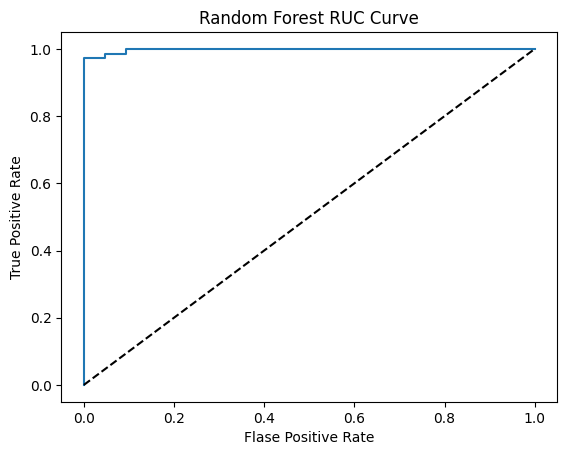

In [81]:
false_pos,true_pos,threshold = roc_curve(y_test, y_pred_rf_gridcv_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest RUC Curve")
plt.show()

4. SVM(Support Vector Machine)

In [82]:
from sklearn.svm import SVC

Feature Selection

In [243]:
svm_model = SVC(kernel='linear')

In [247]:
rfe = RFE(svm_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
X_df = pd.DataFrame(X, columns=feature_names)
selected_features = X_df.columns[rfe.support_]
print("Top 10 Selected Features: \n", selected_features)

Top 10 Selected Features: 
 Index(['mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'area error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst area', 'worst fractal dimension'],
      dtype='object')


check best kernel suited to our data 
i.e - linear, RBF(Radial Basis Function), sigmoid, polynomial

Use GridSearchCV 

In [248]:
param_grid_svm ={
    'kernel':['linear','rfd','poly','sigmoid'],
    'C':[0.1,1,10,100],
    'gamma':['scale','auto',0.001,0.01,0.1,1]
}

In [249]:
svm_gridcv = GridSearchCV(SVC(),param_grid_svm, cv=5,scoring='accuracy')
svm_gridcv.fit(X_train_rfe, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rfd', 'poly', 'sigmoid']},
             scoring='accuracy')

In [250]:
print("Best Hyperparameters : ", svm_gridcv.best_params_)

Best Hyperparameters :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [251]:
svm_model = SVC(**svm_gridcv.best_params_,probability=True)
svm_model.fit(X_train_rfe, y_train)

SVC(C=10, kernel='linear', probability=True)

In [252]:
y_pred_svm = svm_model.predict(X_test_rfe)

In [254]:
y_pred_svm_prob = svm_model.predict_proba(X_test_rfe)[:,1]
y_pred_svm = (y_pred_svm_prob > 0.5).astype(int)

In [255]:
print("Train Accuracy Score : ", svm_model.score(X_train_rfe,y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_svm))
print("Precision : ", precision_score(y_test, y_pred_svm))
print("Recall : ", recall_score(y_test, y_pred_svm))
print("F1 Score : ", f1_score(y_test, y_pred_svm))
print("AUC score : ", roc_auc_score(y_test, y_pred_svm_prob))
print("Classification Report : \n", classification_report(y_test, y_pred_svm))

Train Accuracy Score :  0.978021978021978
Test Accuracy Score :  0.9649122807017544
Precision :  0.958904109589041
Recall :  0.9859154929577465
F1 Score :  0.9722222222222222
AUC score :  0.9980347199475925
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



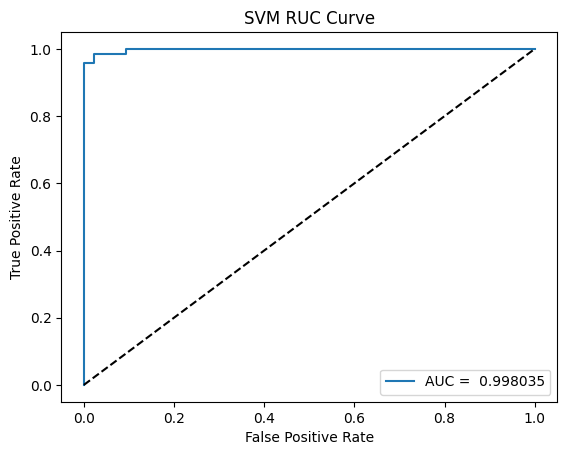

In [256]:
false_pos,true_pos,threshold = roc_curve(y_test, y_pred_svm_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score: 2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM RUC Curve')
plt.legend()
plt.show()

5. KNN(K-Nearest Neighbour)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn[:10])

[1 0 0 1 1 0 0 0 0 1]


Measure performance of model

In [95]:
print("Train Accuracy Score : ", knn.score(X_train, y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_knn))
print("Precision : ", precision_score(y_test, y_pred_knn))
print("Recall : ", recall_score(y_test, y_pred_knn))
print("F1 Score : ", f1_score(y_test, y_pred_knn))
print("Classification Report : \n", classification_report(y_test, y_pred_knn))

Train Accuracy Score :  0.9802197802197802
Test Accuracy Score :  0.9473684210526315
Precision :  0.9577464788732394
Recall :  0.9577464788732394
F1 Score :  0.9577464788732394
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Hyperparameter tuning using GridSearchCV model


In [274]:
smote =  SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [264]:
param_grid_knn ={
    'n_neighbors': range(1, 21, 2), 
    'metric':['euclidean','manhattan','minkowski'],
    'weights':['uniform','distance']
}

In [266]:
knn_model = KNeighborsClassifier()
gridcv_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
gridcv_knn.fit(X_train_rfe, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [267]:
print("Best Hyperparameters : ", gridcv_knn.best_params_)

Best Hyperparameters :  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [268]:
knn_model= KNeighborsClassifier(**gridcv_knn.best_params_)
knn_model.fit(X_train_rfe, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [269]:
y_pred_knn = knn_model.predict(X_test_rfe)

In [270]:
y_pred_knn_prob = knn_model.predict_proba(X_test_rfe)[:,1]
y_pred_knn = (y_pred_knn_prob > 0.5).astype(int)

Check performance of model

In [275]:
print("Train Accuracy Score : ", knn_model.score(X_train_rfe,y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_knn))
print("Precision : ", precision_score(y_test, y_pred_knn))
print("Recall : ", recall_score(y_test, y_pred_knn))
print("F1 Score : ", f1_score(y_test, y_pred_knn))
print("AUC Score : ",roc_auc_score(y_test, y_pred_knn_prob))
print("Classification Report : \n",classification_report(y_test, y_pred_knn))

Train Accuracy Score :  0.9868131868131869
Test Accuracy Score :  0.9649122807017544
Precision :  0.958904109589041
Recall :  0.9859154929577465
F1 Score :  0.9722222222222222
AUC Score :  0.9846053062561415
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



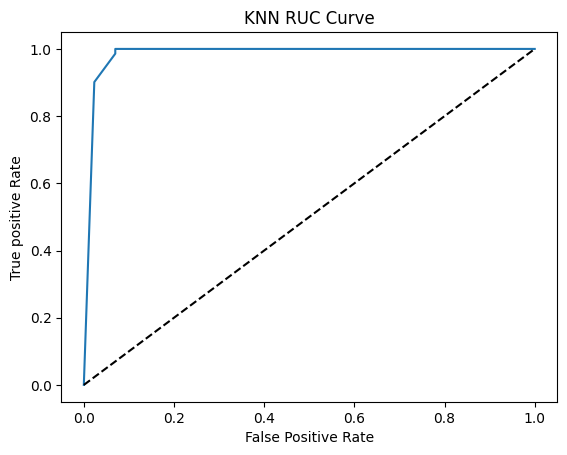

In [276]:
false_pos,true_pos,threshold = roc_curve(y_test,y_pred_knn_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("KNN RUC Curve")
plt.show()


6. Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [107]:
y_pred_nb = nb.predict(X_test)

See model performance using metrics

In [108]:
print("Accuracy metrics : ",accuracy_score(y_test, y_pred_nb))
print("Classification Report : \n",classification_report(y_test,y_pred_nb))

Accuracy metrics :  0.9649122807017544
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Hyperparameter Tuning - GridSearchCV model

In [109]:
param_grid_nb={
    'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]
}

In [110]:
nb = GaussianNB()
grid_cv_nb = GridSearchCV(nb,param_grid_nb, cv=5, scoring='accuracy')
grid_cv_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             scoring='accuracy')

In [111]:
print("Best Hyperparameters : ", grid_cv_nb.best_params_)

Best Hyperparameters :  {'var_smoothing': 1e-09}


In [112]:
nb_model = GaussianNB(**grid_cv_nb.best_params_)
nb_model.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred_nb = nb_model.predict(X_test)

In [114]:
y_pred_nb_prob = nb_model.predict_proba(X_test)[:,1]
y_pred_nb = (y_pred_nb_prob >0.5).astype(int)

Evaluate Model Performance

In [115]:
print("Train Accuracy Score : ", nb_model.score(X_train,y_train))
print("Test Äccuracy Score : ", accuracy_score(y_test, y_pred_nb))
print("AUC Score : ", roc_auc_score(y_test, y_pred_nb_prob))
print("Precision : ", precision_score(y_test, y_pred_nb))
print("Recall : ", recall_score(y_test, y_pred_nb))
print("F1 Score : ", f1_score(y_test, y_pred_nb))
print("Classification Report : \n", classification_report(y_test, y_pred_nb))

Train Accuracy Score :  0.9362637362637363
Test Äccuracy Score :  0.9649122807017544
AUC Score :  0.9973796265967901
Precision :  0.958904109589041
Recall :  0.9859154929577465
F1 Score :  0.9722222222222222
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



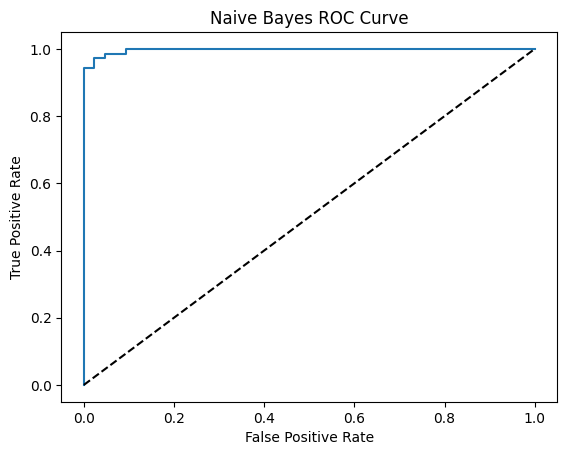

In [116]:
false_pos,true_pos,threshold = roc_curve(y_test,y_pred_nb_prob)
auc_score = auc(false_pos, true_pos)

plt.plot(false_pos, true_pos, label=f'AUC : {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()

7. XGBoost

In [117]:
import xgboost as xgb

In [118]:
xgb_model = xgb.XGBClassifier(
    booster = 'gbtree',
    learning_rate = 0.05, 
    max_depth = 4,
    min_child_weight = 2,
    gamma = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    n_estimators = 200,
    objective='binary:logistic',
    eval_metric = 'auc',
    random_state =42
)

In [119]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [120]:
y_pred_xgb = xgb_model.predict(X_test)

In [121]:
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:,1]
y_pred_xgb = (y_pred_xgb>0.5).astype(int)

In [122]:
print("Train Accuracy Score : ", xgb_model.score(X_train, y_train))
print("Train Accuracy Score : ", accuracy_score(y_test, y_pred_xgb))
print("AUC Score : ", roc_auc_score(y_test, y_pred_xgb_prob))
print("Precision : ", precision_score(y_test, y_pred_xgb))
print("Recall : ", recall_score(y_test, y_pred_xgb))
print("F1 Score : ", f1_score(y_test, y_pred_xgb))
print("Classification Report : ", classification_report(y_test, y_pred_xgb))

Train Accuracy Score :  0.9934065934065934
Train Accuracy Score :  0.9649122807017544
AUC Score :  0.9921388797903702
Precision :  0.958904109589041
Recall :  0.9859154929577465
F1 Score :  0.9722222222222222
Classification Report :                precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



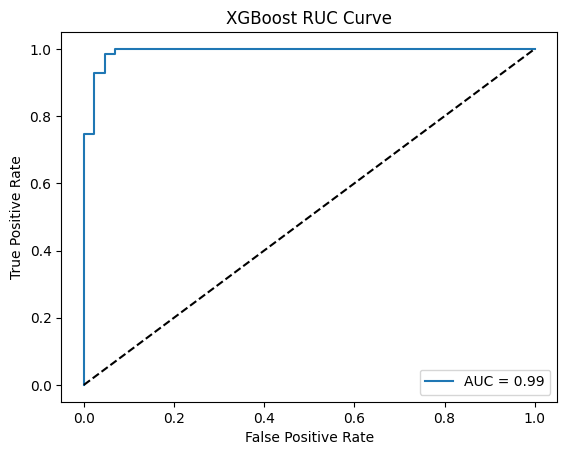

In [123]:
false_pos, true_pos, threshold = roc_curve(y_test,y_pred_xgb_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost RUC Curve')
plt.legend()
plt.show()

Now comapare all model's performance that will give us clear vision to which model is best predict the results.

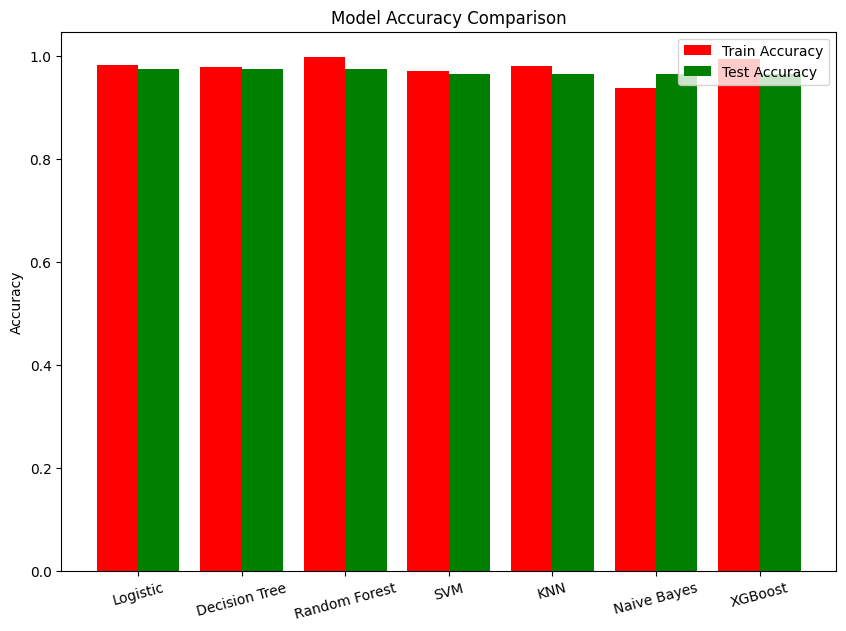

In [305]:
models = ["Logistic","Decision Tree","Random Forest","SVM","KNN","Naive Bayes","XGBoost"]
train_accuracy = [0.9807, 0.9772, 0.9965, 0.9708, 0.9802, 0.9362, 0.9934]
test_accuracy = [0.9736, 0.9736, 0.9736, 0.9649, 0.9649, 0.9649, 0.9649]

x = np.arange(len(models))
plt.figure(figsize=(10,7))
plt.bar(x-0.2,train_accuracy,0.4, label="Train Accuracy", color='red')
plt.bar(x+0.2, test_accuracy, 0.4, label="Test Accuracy", color='green')
plt.xticks(x,models,rotation=15)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()

Precision, Recall and f1-score comparision

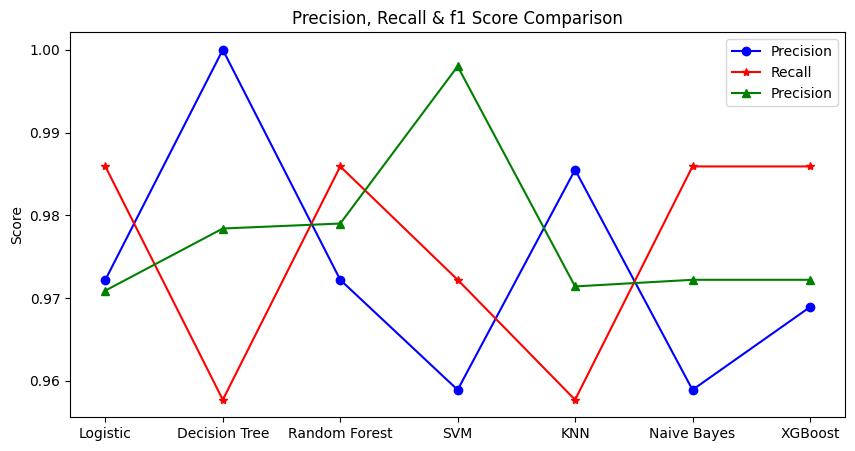

In [262]:
precision = [0.9722, 1.0, 0.9722, 0.9589, 0.9855, 0.9589, 0.9689]
recall = [0.9859, 0.9577, 0.9859, 0.9722, 0.9577, 0.9859, 0.9859]
f1_scores = [0.9709, 0.9784, 0.9790, 0.9980, 0.9714, 0.9722, 0.9722]

plt.figure(figsize=(10,5))
plt.plot(models, precision, marker='o', label='Precision', color='blue')
plt.plot(models, recall, marker='*', label='Recall', color='red')
plt.plot(models, f1_scores, marker='^',label='Precision', color='green')

plt.ylabel("Score")
plt.title("Precision, Recall & f1 Score Comparison")
plt.legend()
plt.show()

Evaluting Best Model
By observing training accuracy, testing accuracy, f1-score, precision, recall score logistic regression and SVM  is the best for prediction.

SVM is the best model to predict the results based on the performance metrics, training and testing accuracy.

In [126]:
import joblib

In [306]:
joblib.dump(best_gridcv_logistic, "models/breast_cancer_model.pkl")

['models/breast_cancer_model.pkl']

In [310]:
import joblib

try:
    model = joblib.load("models/breast_cancer_model.pkl")
    print("Model loaded successfully!")
except Exception as e:
    print("Error loading model:", e)


Model loaded successfully!


In [313]:
print(best_gridcv_logistic.n_features_in_) 


10
